In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score,f1_score,classification_report
import pickle
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
''' Link to the Stock data'''
icic=pd.read_csv('https://raw.githubusercontent.com/BharatsoPrem/Cloud_Comp_proj/main/Reduced%20Feature%20Target/ICICReduced-FeatureTarget.csv')
alibaba=pd.read_csv('https://raw.githubusercontent.com/BharatsoPrem/Cloud_Comp_proj/main/Reduced%20Feature%20Target/ALI_BABAReduced-FeatureTarget.csv')
mufg=pd.read_csv('https://raw.githubusercontent.com/BharatsoPrem/Cloud_Comp_proj/main/Reduced%20Feature%20Target/MUFG_ADRReduced-FeatureTarget.csv')
smfg=pd.read_csv('https://raw.githubusercontent.com/BharatsoPrem/Cloud_Comp_proj/main/Reduced%20Feature%20Target/SMFGReduced-FeatureTarget.csv')
umc=pd.read_csv('https://raw.githubusercontent.com/BharatsoPrem/Cloud_Comp_proj/main/Reduced%20Feature%20Target/UMCReduced-FeatureTarget.csv')

In [ ]:
stock=smfg # Provide stock name

In [ ]:
X=stock.iloc[:,1:-6] # Feature Matrix
y=stock.iloc[:,-1] # Target
X

,UMC_TAIEX_CO,UMC_TAIEX_HL
0,0.030928,0.037801
1,0.009901,0.023411
2,-0.006452,0.016340
3,0.000000,0.025890
4,-0.009524,0.012862
...,...,...
4564,0.003788,0.017241
4565,-0.009488,0.017275
4566,-0.011516,0.025440
4567,0.001923,0.013540


In [ ]:
#   Scaling the Features
sc=StandardScaler()
s_feat=sc.fit_transform(X)
x_train,x_test,y_train,y_test=train_test_split(s_feat,y,test_size=0.20)

# Resampling incase of class imbalance ( use it for UMC and SMFG)
oversampler = RandomOverSampler()
# undersample = RandomUnderSampler(sampling_strategy='majority')
x_train, y_train = oversampler.fit_resample(x_train, y_train)

In [ ]:
xgbc=XGBClassifier(learning_rate=0.01,eval_metric='auc',n_jobs=-1,max_depth=5) # Initializing XGBoost Classifier
cv = RepeatedKFold(n_splits=10, n_repeats=3)                                   # K fold Cross Validation
scores=cross_val_score(xgbc, x_train, y_train, cv=cv, n_jobs=-1)
print(scores)
#params={ 
#         'max_depth' : [*range(1,11)],
#        'max_leaves' : [None,*range(1,11)],
#        'n_estimators' : [10,100,200]}
#rs_model=RandomizedSearchCV(xgbc,param_distributions=params,n_iter=100,cv=8,verbose=True)

[0.58932715 0.6287703  0.61948956 0.60556845 0.5800464  0.55220418
 0.60092807 0.60324826 0.57540603 0.63805104 0.63573086 0.59860789
 0.58700696 0.59860789 0.5962877  0.58700696 0.61020882 0.61484919
 0.60324826 0.58236659 0.62645012 0.64037123 0.63805104 0.61948956
 0.60092807 0.55916473 0.57308585 0.57076566 0.61484919 0.57772622]


In [ ]:
# Mean accuracy scores 
scores = abs(scores)
print('Mean accuracy: %.3f (%.3f)' % (scores.mean(), scores.std()))

Mean accuracy: 0.601 (0.023)


In [ ]:

pipe=Pipeline([('xgb_randomized', xgbc)]) # Pipeline to accomodate xgb classifier 

In [ ]:
pipe.fit(x_train,y_train) # Fitting the pipeline

Pipeline(steps=[('xgb_randomized',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='auc',
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=-1, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [ ]:

yhat=pipe.predict(x_test)  # Predicting the Trend


In [ ]:
print(f'The test accuracy score is : {pipe.score(x_test, y_test)}')  # Test Accuracy
print()

The test accuracy score is : 0.5831509846827133



In [ ]:
cg=confusion_matrix(y_test,yhat) # Confusion Matrix

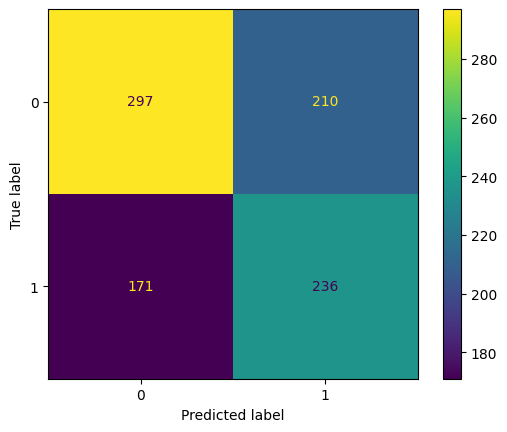

In [ ]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
gc=ConfusionMatrixDisplay(cg)
gc.plot()
plt.show()

In [ ]:
print(classification_report(y_test,yhat))    # Classification Report

              precision    recall  f1-score   support

           0       0.63      0.59      0.61       507
           1       0.53      0.58      0.55       407

    accuracy                           0.58       914
   macro avg       0.58      0.58      0.58       914
weighted avg       0.59      0.58      0.58       914



In [ ]:
f1_score(y_test,yhat)        # F1 score

0.5533411488862837

In [ ]:
#len(y_train[y_train>0])

2155

In [ ]:
#len(y_train[y_train==0])

2155

In [ ]:
# class imbalance- smfg 
# class imbalance - umc

In [ ]:
#sc.get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

In [ ]:
'''To save the standard scaler's fit parameters'''
#with open('scaler_fit_params_umc.pkl', 'wb') as f:
#     pickle.dump(sc.get_params(), f)

In [ ]:
'''To save the model'''

# filename = 'xgb_mod_umc.sav'
# pickle.dump(xgbc, open(filename, 'wb'))